In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 고객 1명당 주문 횟수 분석

In [70]:
orders = pd.read_csv('./datas/orders.csv')
orders.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [15]:
users = orders[orders['eval_set'] == 'prior']
users['days_since_prior_order'].dropna()

users = users.groupby('user_id').agg(user_orders= ('order_number' , max))
users.head()

,user_orders
user_id,
1,10
2,14
3,12
4,5
5,4


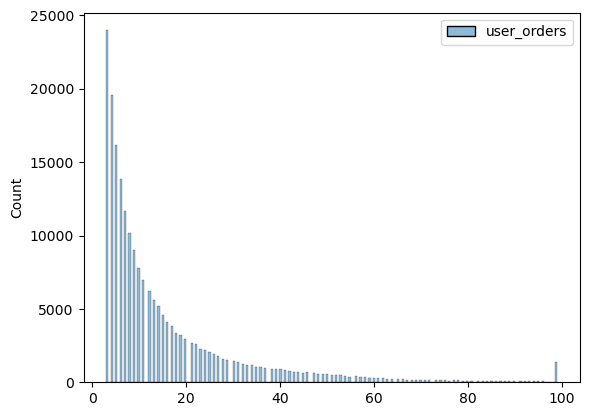

In [68]:
histplot = sns.histplot(users)
plt.show()

In [ ]:
len(users.loc[(users['user_orders'] == 4)]) # 99++

### 4번은 0~4번 구매 고객으로 판단 99는 99번 구매 이상으로 판단 
### 대부분 고객이 0~20번 구매를 하였다.

# 2. 요일 별 구매 수량 분석

/Users/carly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_dow', ylabel='count'>

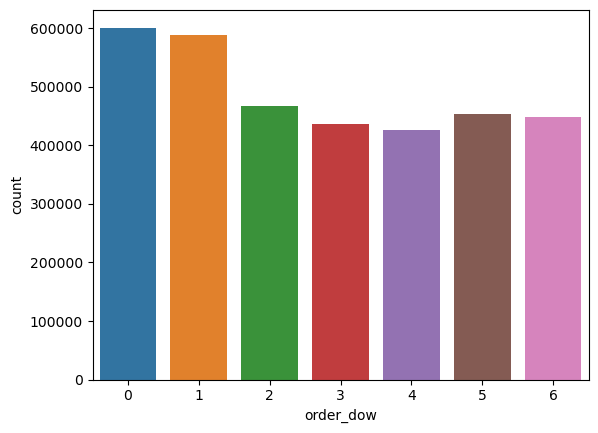

In [80]:
sns.countplot(orders['order_dow'])

### 0번쨰요일과 1번째 요일이 가장 주문량이 많았다. 저 요일이 무슨 요일일지 모르겠지만 아마도 토요일, 일요일 주말로 추측된다.

# 3. 재구매 기간 분석

/Users/carly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


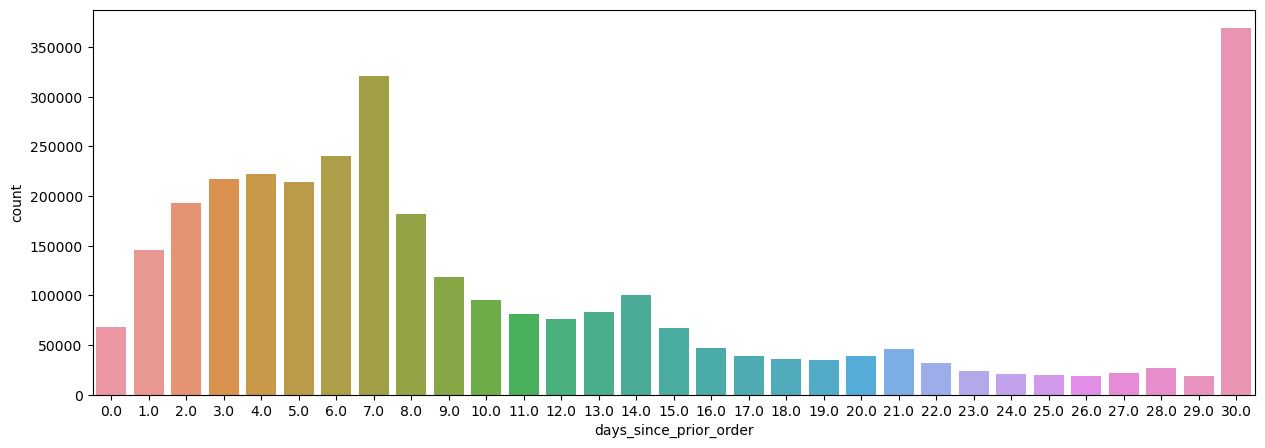

In [92]:
plt.figure(figsize = (15,5))
sns.countplot(orders['days_since_prior_order'])
plt.show()

### 대부분 일주일 이내에 재구매를 하고, 30일 컬럼이 매우 높은걸로 봐 30일은 30일 이상이라도 판단 됨.

# 4. 1번 구매 시 몇개의 상품이 장바구니에 담기는지 분석

145


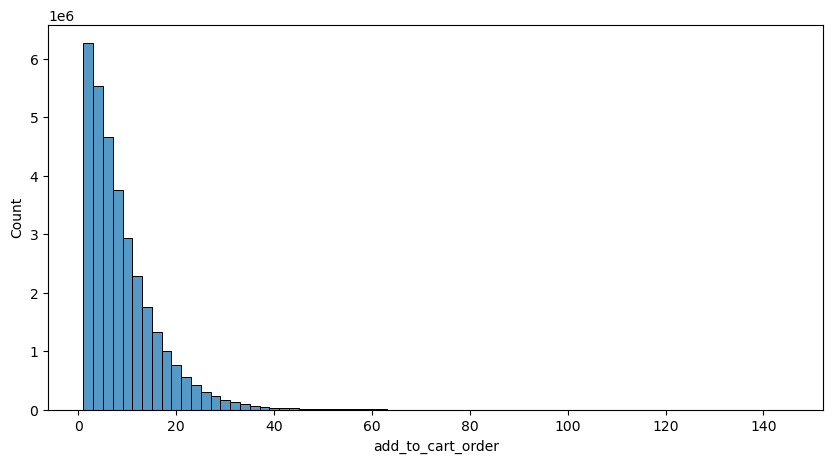

In [116]:
plt.figure(figsize = (10,5))
order_products__prior = pd.read_csv('./datas/order_products__prior.csv')
sns.histplot(order_products__prior['add_to_cart_order'], binwidth=2, bins=100000)
print(order_products__prior['add_to_cart_order'].max())

### 대부분 1~10개의 상품이 한번 구매 시 장바구니에 담기고, 놀랍게도 145개의 상품을 장바구니에 담아 주문하는 경우도 있었다.

# 5. 가장 많이 구매한 상품은 무엇인가? 분석

In [187]:
product_count = order_products__prior.groupby('product_id').agg(user_orders= ('product_id' , 'count'))
product_count = product_count.sort_values(by=['user_orders'], ascending = False)

product = pd.read_csv('./datas/products.csv')
product_count = product_count.iloc[0:10]
product_count

,user_orders
product_id,
24852,472565
13176,379450
21137,264683
21903,241921
47209,213584
47766,176815
47626,152657
16797,142951
26209,140627


In [192]:
items = []
for idx, row in product_count.iterrows():
    items.append(product.iloc[idx-1][1])
items

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Strawberries',
 'Limes',
 'Organic Whole Milk']

In [211]:
product_count['items'] = items
product_count

,user_orders,items
product_id,,
24852,472565,Banana
13176,379450,Bag of Organic Bananas
21137,264683,Organic Strawberries
21903,241921,Organic Baby Spinach
47209,213584,Organic Hass Avocado
47766,176815,Organic Avocado
47626,152657,Large Lemon
16797,142951,Strawberries
26209,140627,Limes


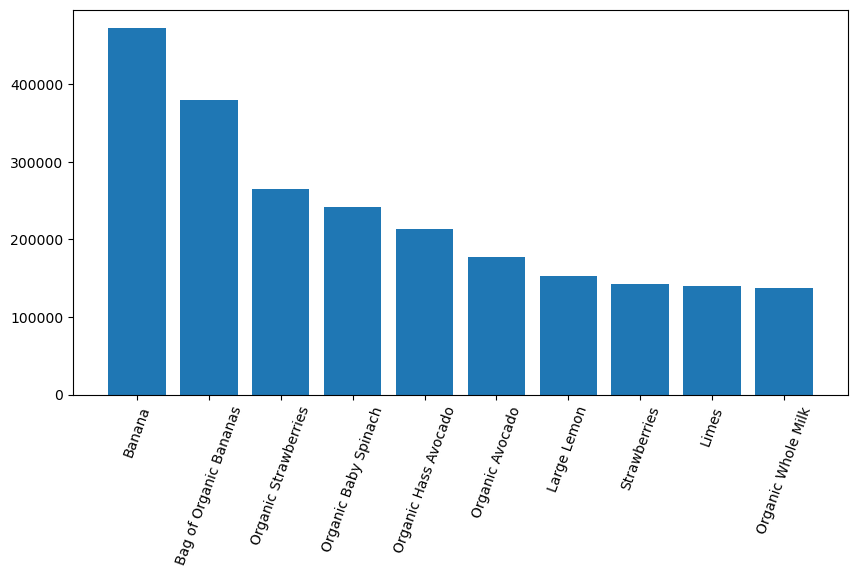

In [225]:
plt.figure(figsize = (10,5))
plt.bar(product_count['items'], product_count['user_orders'])
plt.xticks(rotation=70)
plt.show()

### 바나나, 딸기, 시금치, 아보카도, 레몬, 딸기 등등 유기농 과일 & 채소의 주문량이 매우 많았다.